Please find below the Project 2 for Unsupervised Learning course. This is an individual assignment. Kindly submit it before it's deadline.

The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
Four &quot;Corgie&quot; model vehicles were used for the experiment: a double decker bus, Cheverolet
van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

The points distribution for this case is as follows:
1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)
2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)
3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points
4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [270]:
#Import all the necessary modules
from pandas import read_csv
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
from sklearn import metrics
import sklearn.metrics as mt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings; warnings.simplefilter('ignore')
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

### Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [271]:
Veh_df = pd.read_csv("vehicle.csv") # Read Dataset
Veh_df.shape

(846, 19)

In [272]:
# Check for null records
Veh_df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [273]:
Veh_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [274]:
Veh_df.dropna(inplace =True)
Veh_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [275]:
Veh_df['class'].value_counts() # 16 records from car , 13 records from bus and 4 records from van are removed

car    413
bus    205
van    195
Name: class, dtype: int64

In [276]:
# Replace categorical # as numerical

classasnums = {"class":     {"car": 1, "van": 2, "bus": 3}}
Veh_df.replace(classasnums,inplace=True)

Veh_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [277]:
# finding outliers
Q1 = Veh_df.quantile(0.25)
Q3 = Veh_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


compactness                     13.0
circularity                      9.0
distance_circularity            28.0
radius_ratio                    54.0
pr.axis_aspect_ratio             8.0
max.length_aspect_ratio          3.0
scatter_ratio                   52.0
elongatedness                   13.0
pr.axis_rectangularity           4.0
max.length_rectangularity       22.0
scaled_variance                 50.0
scaled_variance.1              268.0
scaled_radius_of_gyration       49.0
scaled_radius_of_gyration.1      8.0
skewness_about                   7.0
skewness_about.1                13.0
skewness_about.2                 9.0
hollows_ratio                   10.0
class                            2.0
dtype: float64


In [278]:
Veh_df.describe().T

count        mean         std    min    25%  \
compactness                  813.0   93.656827    8.233751   73.0   87.0   
circularity                  813.0   44.803198    6.146659   33.0   40.0   
distance_circularity         813.0   82.043050   15.783070   40.0   70.0   
radius_ratio                 813.0  169.098401   33.615402  104.0  141.0   
pr.axis_aspect_ratio         813.0   61.774908    7.973000   47.0   57.0   
max.length_aspect_ratio      813.0    8.599016    4.677174    2.0    7.0   
scatter_ratio                813.0  168.563346   33.082186  112.0  146.0   
elongatedness                813.0   40.988930    7.803380   26.0   33.0   
pr.axis_rectangularity       813.0   20.558426    2.573184   17.0   19.0   
max.length_rectangularity    813.0  147.891759   14.504648  118.0  137.0   
scaled_variance              813.0  188.377614   31.165873  130.0  167.0   
scaled_variance.1            813.0  438.382534  175.270368  184.0  318.0   
scaled_radius_of_gyration    813.0  174.252153   32.332161  109.0  149.0   
scaled_radius_of_gyration.1  813.0   72.399754    7.475994   59.0   67.0   
skewness_about               813.0    6.351784    4.921476    0.0    2.0   
skewness_about.1             813.0   12.687577    8.926951    0.0    6.0   
skewness_about.2             813.0  188.979090    6.153681  176.0  184.0   
hollows_ratio                813.0  195.729397    7.398781  181.0  191.0   
class                        813.0    1.744157    0.833995    1.0    1.0   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          79.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            364.0  586.0  1018.0  
scaled_radius_of_gyration    173.0  198.0   268.0  
scaled_radius_of_gyration.1   71.0   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             189.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0  
class                          1.0    3.0     3.0

<function matplotlib.pyplot.show(*args, **kw)>

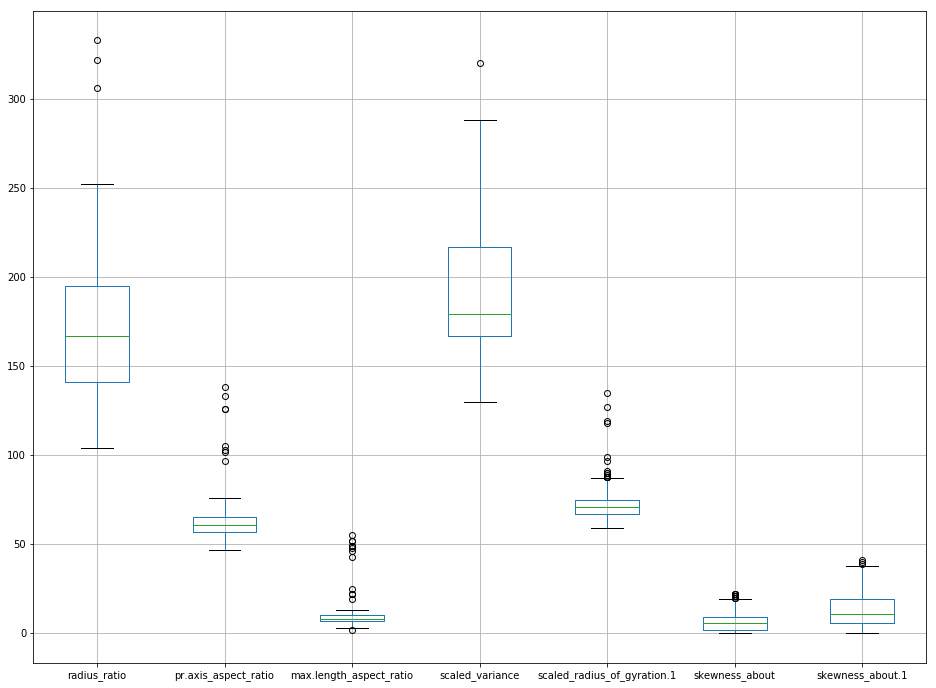

In [279]:
# below variable have few to significant outliers(scaled_radius_of_gyration,pr.axis_rectangularity,max.length_aspect_ratio) )

cols =['radius_ratio','pr.axis_aspect_ratio', 'max.length_aspect_ratio',
       'scaled_variance','scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1']
fig = plt.figure(figsize=(16,12))
Veh_df.boxplot(cols)
plt.show


In [280]:
# Outlier removal
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(Veh_df))
if len(np.where(z > 3)) > 1:
    Veh_df = Veh_df[(z < 3).all(axis=1)]
Veh_df.shape

(792, 19)

<function matplotlib.pyplot.show(*args, **kw)>

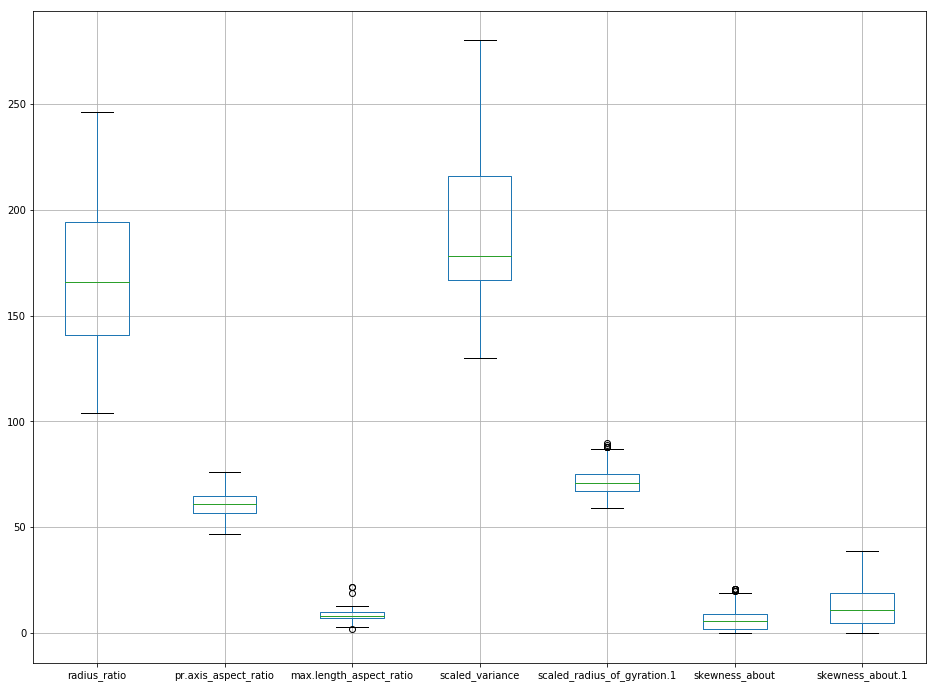

In [281]:
cols =['radius_ratio','pr.axis_aspect_ratio', 'max.length_aspect_ratio',
       'scaled_variance','scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1']
fig = plt.figure(figsize=(16,12))
Veh_df.boxplot(cols)
plt.show

### Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

In [282]:
# Lets understrand the correlation between the features

Veh_df.corr() > 0.5

compactness  circularity  distance_circularity  \
compactness                         True         True                  True   
circularity                         True         True                  True   
distance_circularity                True         True                  True   
radius_ratio                        True         True                  True   
pr.axis_aspect_ratio               False        False                 False   
max.length_aspect_ratio            False         True                  True   
scatter_ratio                       True         True                  True   
elongatedness                      False        False                 False   
pr.axis_rectangularity              True         True                  True   
max.length_rectangularity           True         True                  True   
scaled_variance                     True         True                  True   
scaled_variance.1                   True         True                  True   
scaled_radius_of_gyration           True         True                  True   
scaled_radius_of_gyration.1        False        False                 False   
skewness_about                     False        False                 False   
skewness_about.1                   False        False                 False   
skewness_about.2                   False        False                 False   
hollows_ratio                      False        False                 False   
class                              False        False                 False   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                          True                 False   
circularity                          True                 False   
distance_circularity                 True                 False   
radius_ratio                         True                  True   
pr.axis_aspect_ratio                 True                  True   
max.length_aspect_ratio             False                 False   
scatter_ratio                        True                 False   
elongatedness                       False                 False   
pr.axis_rectangularity               True                 False   
max.length_rectangularity            True                 False   
scaled_variance                      True                 False   
scaled_variance.1                    True                 False   
scaled_radius_of_gyration            True                 False   
scaled_radius_of_gyration.1         False                 False   
skewness_about                      False                 False   
skewness_about.1                    False                 False   
skewness_about.2                    False                 False   
hollows_ratio                        True                 False   
class                               False                 False   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                    False           True   
circularity                                     True           True   
distance_circularity                            True           True   
radius_ratio                                   False           True   
pr.axis_aspect_ratio                           False          False   
max.length_aspect_ratio                         True          False   
scatter_ratio                                  False           True   
elongatedness                                  False          False   
pr.axis_rectangularity                         False           True   
max.length_rectangularity                       True           True   
scaled_variance                                False           True   
scaled_variance.1                              False           True   
scaled_radius_of_gyration                      False           True   
scaled_radius_of_gyration.1                    False          False   
skewness_about                            

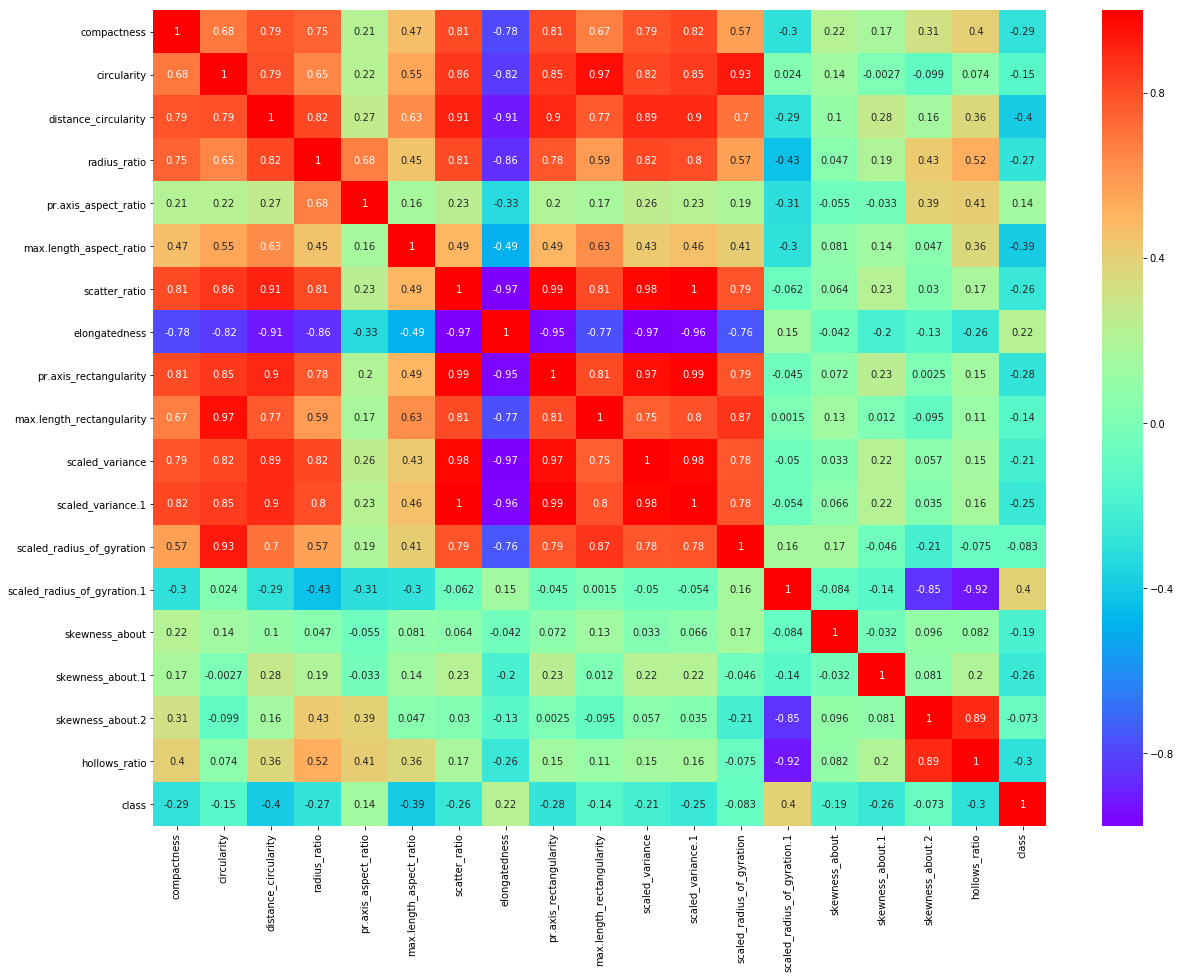

In [283]:
plt.subplots(figsize=(20,15))
sns.heatmap(Veh_df.corr() ,annot=True,cmap='rainbow')

In [284]:
# Observation : (dark orange - highly correlated, purple - negatively correlated)
# scatter ratio has high correlation with radius ratio ,distance,circularity and compactness
# PR Axis rectangularity has high correlation with scaled variances, max length
# scaled radius of gyration shows high correlation among other variables
# elongatedness shows very high negative correlation among other variables
# Compactness also shows high correlation among other variables

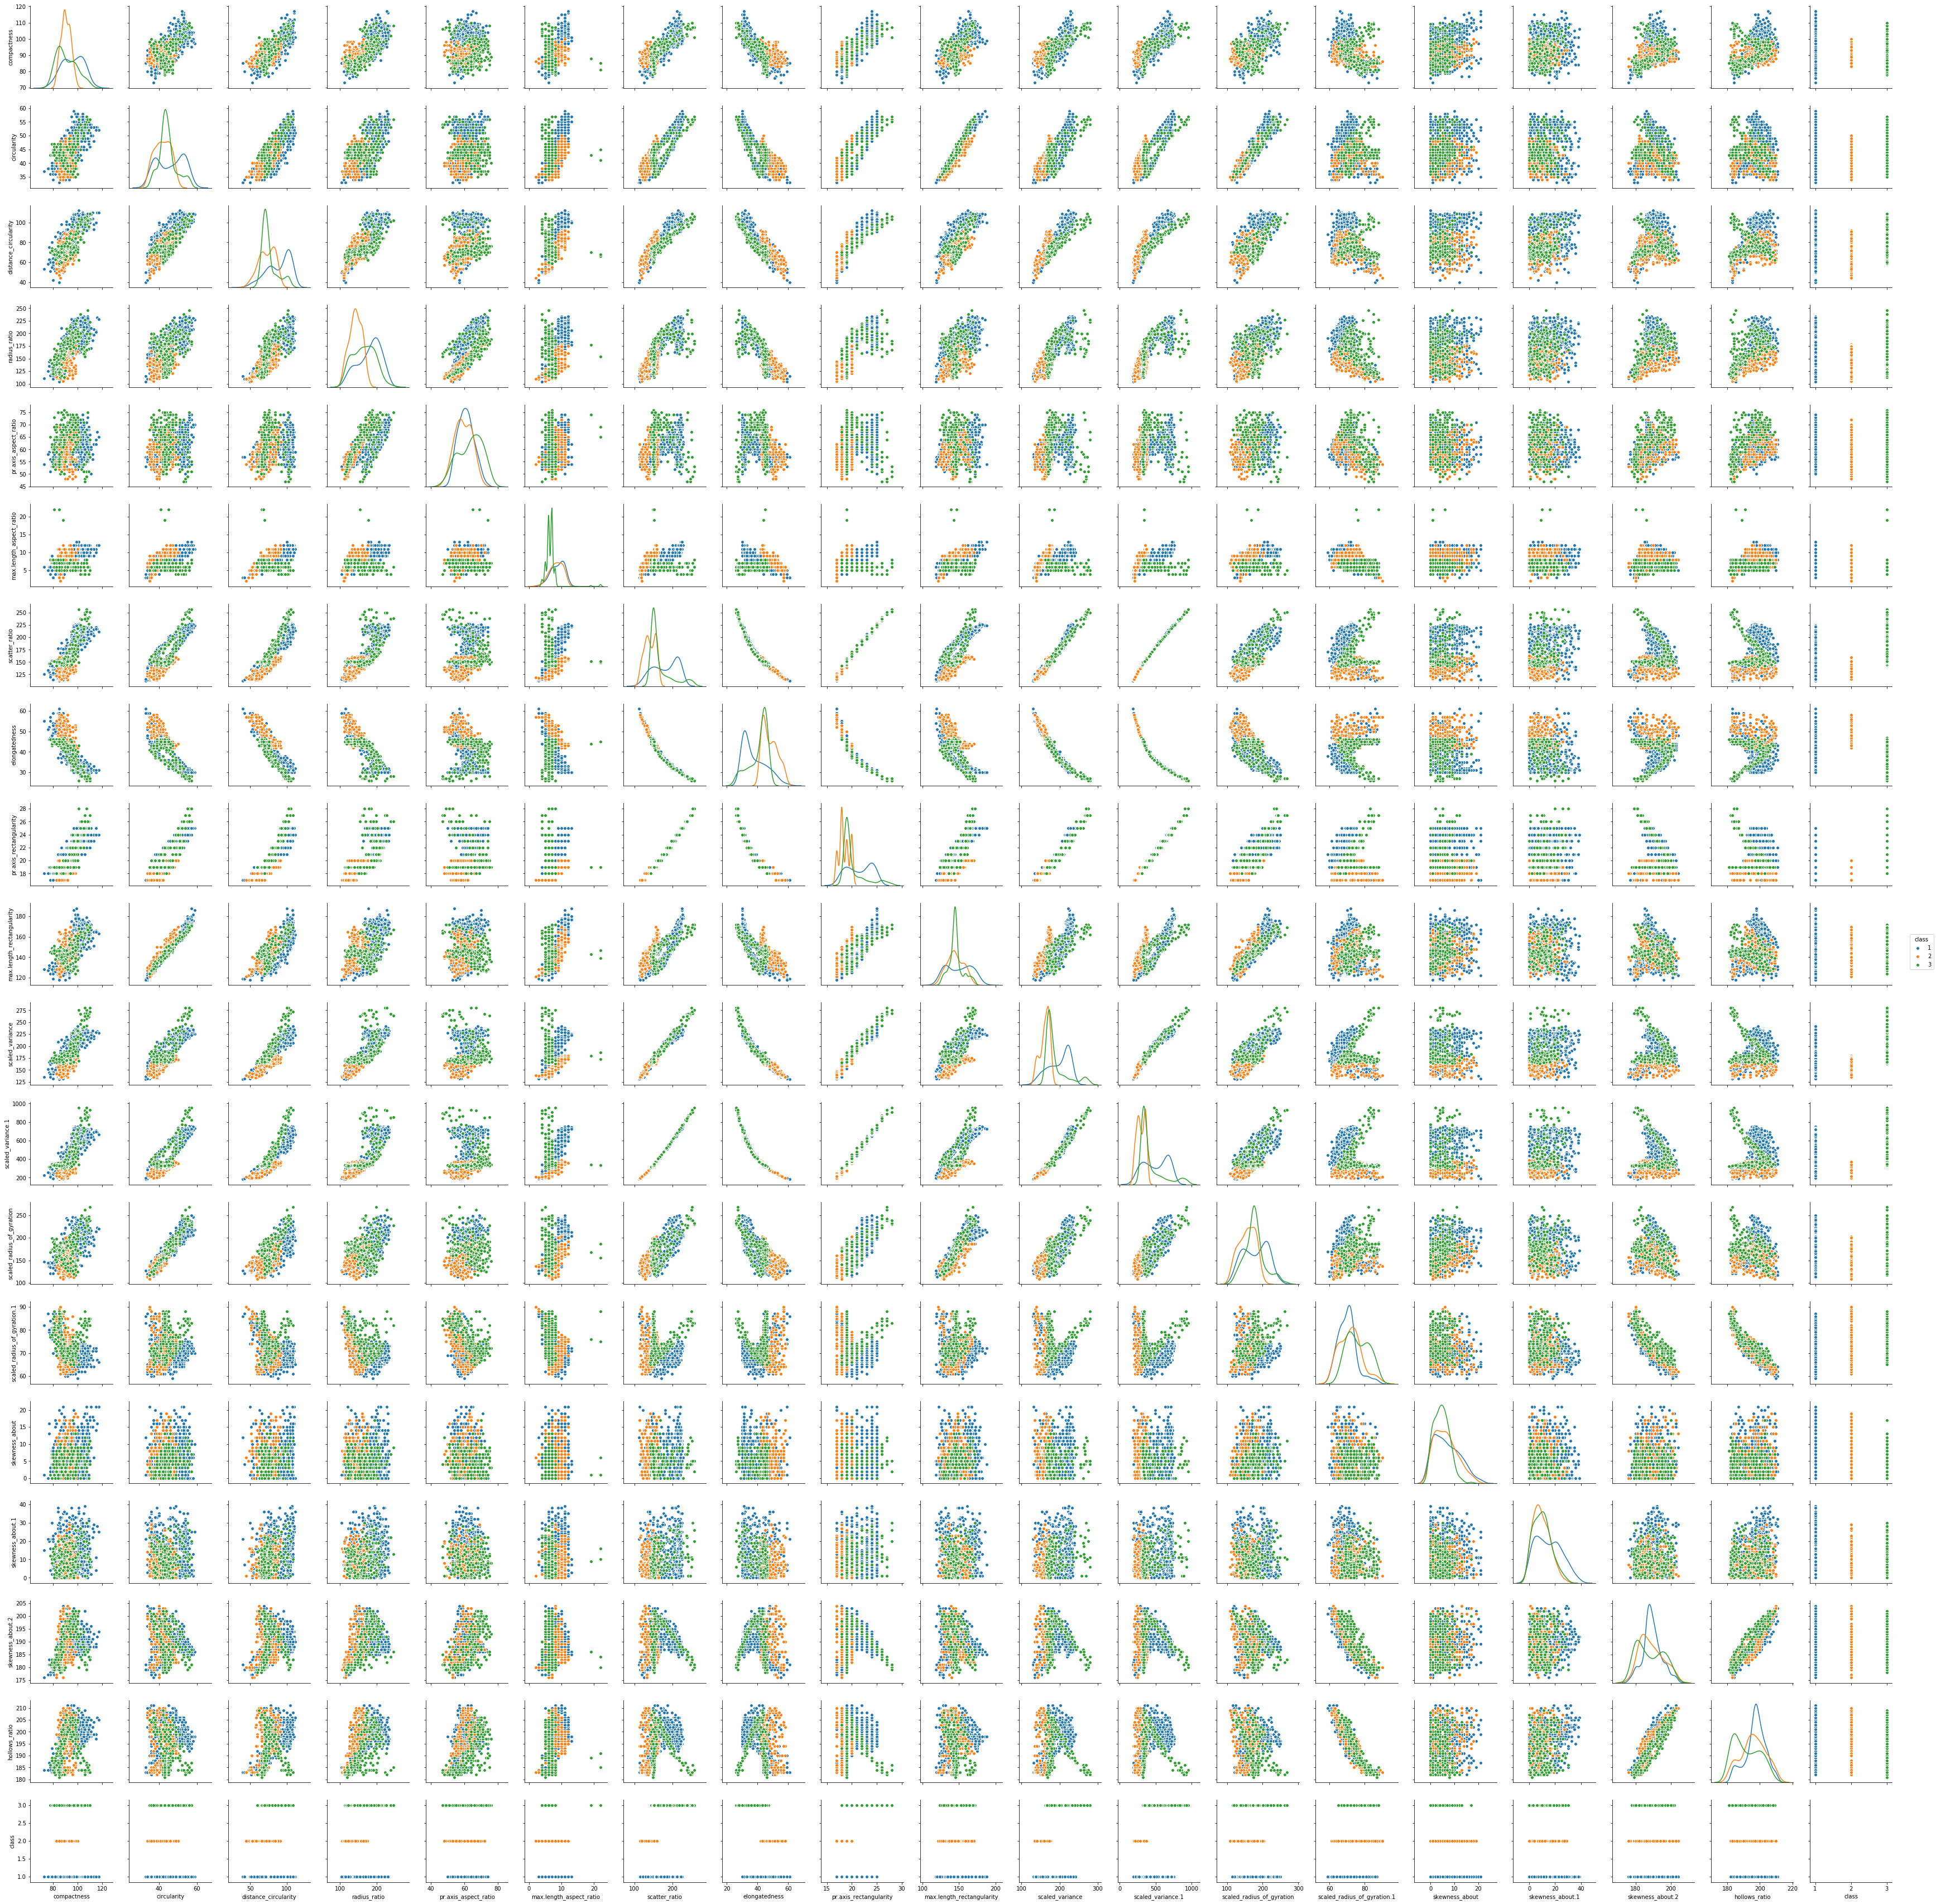

In [285]:
sns.pairplot(Veh_df,hue='class',diag_kind='kde',kind='scatter')

In [291]:
# Looks like all the features are important and there are no significant evidences to remove any

Veh_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
6           97         43.0                  73.0         173.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
6                  65.0                        6          153.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
6           42.0                    19.0                        143   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
6            176.0              361.0                      172.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
6                         66.0            13.0               1.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      1  
3             199.0            207      2  
6             200.0            204      3

### Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points

In [292]:
features=['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']

# Define features
X = Veh_df.loc[:,features].values

# scale the values
X_std = StandardScaler().fit_transform(X)

# Define categorical outcome 
y = Veh_df.loc[:,['class']].values

X.shape, y.shape

((792, 18), (792, 1))

In [293]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00126422  0.68565219  0.78889821  0.75177805  0.21485095  0.47219006
   0.81136643 -0.78576318  0.81162111  0.67363443  0.79252727  0.81879157
   0.57233011 -0.29796208  0.21696729  0.16894988  0.31476676  0.39964927]
 [ 0.68565219  1.00126422  0.79584673  0.65347006  0.22348332  0.54637445
   0.85707177 -0.82272186  0.85597513  0.96708122  0.81729794  0.85085932
   0.93571516  0.02418221  0.14136568 -0.00272107 -0.09917737  0.0742016 ]
 [ 0.78889821  0.79584673  1.00126422  0.82060355  0.26683693  0.63325944
   0.91281395 -0.91284222  0.90210964  0.77166567  0.89424226  0.89794787
   0.70284755 -0.29427077  0.10372954  0.27922884  0.15841475  0.3646131 ]
 [ 0.75177805  0.65347006  0.82060355  1.00126422  0.6760847   0.44646614
   0.80958008 -0.85745944  0.78295043  0.58731625  0.81861164  0.80274493
   0.56733307 -0.43003445  0.04747307  0.19309236  0.42962635  0.52416063]
 [ 0.21485095  0.22348332  0.26683693  0.6760847   1.00126422  0.16323562
   0.2352561

In [294]:
# Step 2- eigen values and eigen vector
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.70471970e-01 -8.46546124e-02 -2.81550327e-02  1.51270429e-01
  -1.49820196e-01  2.35492298e-01 -2.59827367e-01 -7.47749380e-01
   3.50376296e-01  1.81001841e-01 -5.44172849e-02  2.20045447e-02
  -1.61422586e-01 -3.61904733e-04 -7.70078951e-02  3.93157308e-03
   1.61128051e-02 -1.50869892e-02]
 [-2.84252813e-01  1.52206712e-01 -2.03337421e-01 -1.24100210e-02
   1.20217618e-01 -2.21652420e-02  3.78378585e-01 -8.92823580e-02
   4.64506336e-02 -1.46983143e-01  5.90571381e-02 -1.07342661e-01
  -1.13032814e-02 -2.02553267e-02  2.10276027e-01  2.06671016e-01
   6.13070534e-01 -4.31687082e-01]
 [-3.00529449e-01 -3.65381472e-02  8.12796960e-02  9.53154698e-02
   7.80346175e-02 -5.98485882e-03 -1.03547331e-01  3.12642468e-01
   3.67470520e-01 -8.50598662e-02 -7.48399710e-01  3.90124459e-02
   2.28405781e-01  1.00172507e-02 -5.35807277e-02 -2.79398517e-02
  -3.60957500e-02 -1.30173588e-01]
 [-2.76558493e-01 -1.89037167e-01  2.55086939e-02 -2.43114398e-01
  -1.40435674e-01 -

In [295]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 9 entries as there are 9 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. 
print('Variance \n%s', var_explained)
print('\n Cummulative variance \n%s', cum_var_exp)

Variance 
%s [0.5496225074176425, 0.181540546842639, 0.06624093847079084, 0.06349117324855214, 0.048497455877106375, 0.0368199343519144, 0.019021985864415506, 0.012707551816320854, 0.006510020777428166, 0.004946743262296361, 0.0033816115694349593, 0.0025311783184780523, 0.0016040644428426624, 0.001183393474734765, 0.0008413288848175533, 0.0006984065159083468, 0.00034096869674396843, 2.019016793344594e-05]

 Cummulative variance 
%s [0.54962251 0.73116305 0.79740399 0.86089517 0.90939262 0.94621256
 0.96523454 0.97794209 0.98445211 0.98939886 0.99278047 0.99531165
 0.99691571 0.99809911 0.99894043 0.99963884 0.99997981 1.        ]


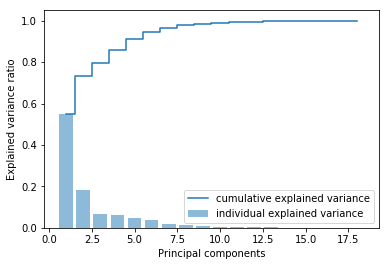

In [296]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [297]:
# > 7 components lead to variance > 95%.

pca = PCA(n_components=7)
pca.fit(X_std)
X_pca = pca.transform(X_std)
X_pca.shape

(792, 7)

In [298]:
principalDf = pd.DataFrame(data = X_pca
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7'])

principalDf.head(5)

principal component 1  principal component 2  principal component 3  \
0              -0.639301              -0.525956              -0.540854   
1               1.490457              -0.358226              -0.146080   
2              -3.997646               0.410717              -1.180166   
3               1.435807              -3.048714              -0.423921   
4               0.687239              -2.279554              -1.998322   

   principal component 4  principal component 5  principal component 6  \
0              -0.748840               0.812610               1.729893   
1               1.222346               0.408190               0.076216   
2               0.261862              -0.859488               0.660251   
3               0.301402               0.710019              -0.378279   
4              -0.135610              -1.370560              -0.579664   

   principal component 7  
0              -0.319566  
1               0.151202  
2               0.736923  
3               0.126805  
4              -0.294773

In [299]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.905712346075743, array([-0.27047197, -0.28425281, -0.30052945, -0.27655849, -0.10942191,
       -0.1897061 , -0.30885977,  0.30666789, -0.30577692, -0.27306461,
       -0.30225039, -0.30645368, -0.2573753 ,  0.06569711, -0.03727163,
       -0.06325799, -0.04828204, -0.10113638])), (3.271860980769485, array([-0.08465461,  0.15220671, -0.03653815, -0.18903717, -0.2410159 ,
       -0.06243091,  0.07638706, -0.01741131,  0.08979018,  0.13965894,
        0.07067315,  0.07886261,  0.21955279,  0.50323698, -0.02533961,
       -0.09221777, -0.51150719, -0.50344276])), (1.19384427160505, array([-0.02815503, -0.20333742,  0.0812797 ,  0.02550869, -0.14459025,
       -0.10918798,  0.10955832, -0.09080794,  0.10983203, -0.20642784,
        0.13432005,  0.10983597, -0.22194488,  0.06358109, -0.5053389 ,
        0.70557908, -0.06916616, -0.03807899])), (1.1442859239334506, array([ 0.15127043, -0.01241002,  0.09531547, -0.2431144 , -0.59872739,
        0.24857713, -0.00779019,  0.07728301,  0.019

In [317]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:7])   # Reducing from 18 to 7 dimension space

X_std_R = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_R)  # converting array to dataframe for pairplot
Proj_data_df.shape

(792, 7)

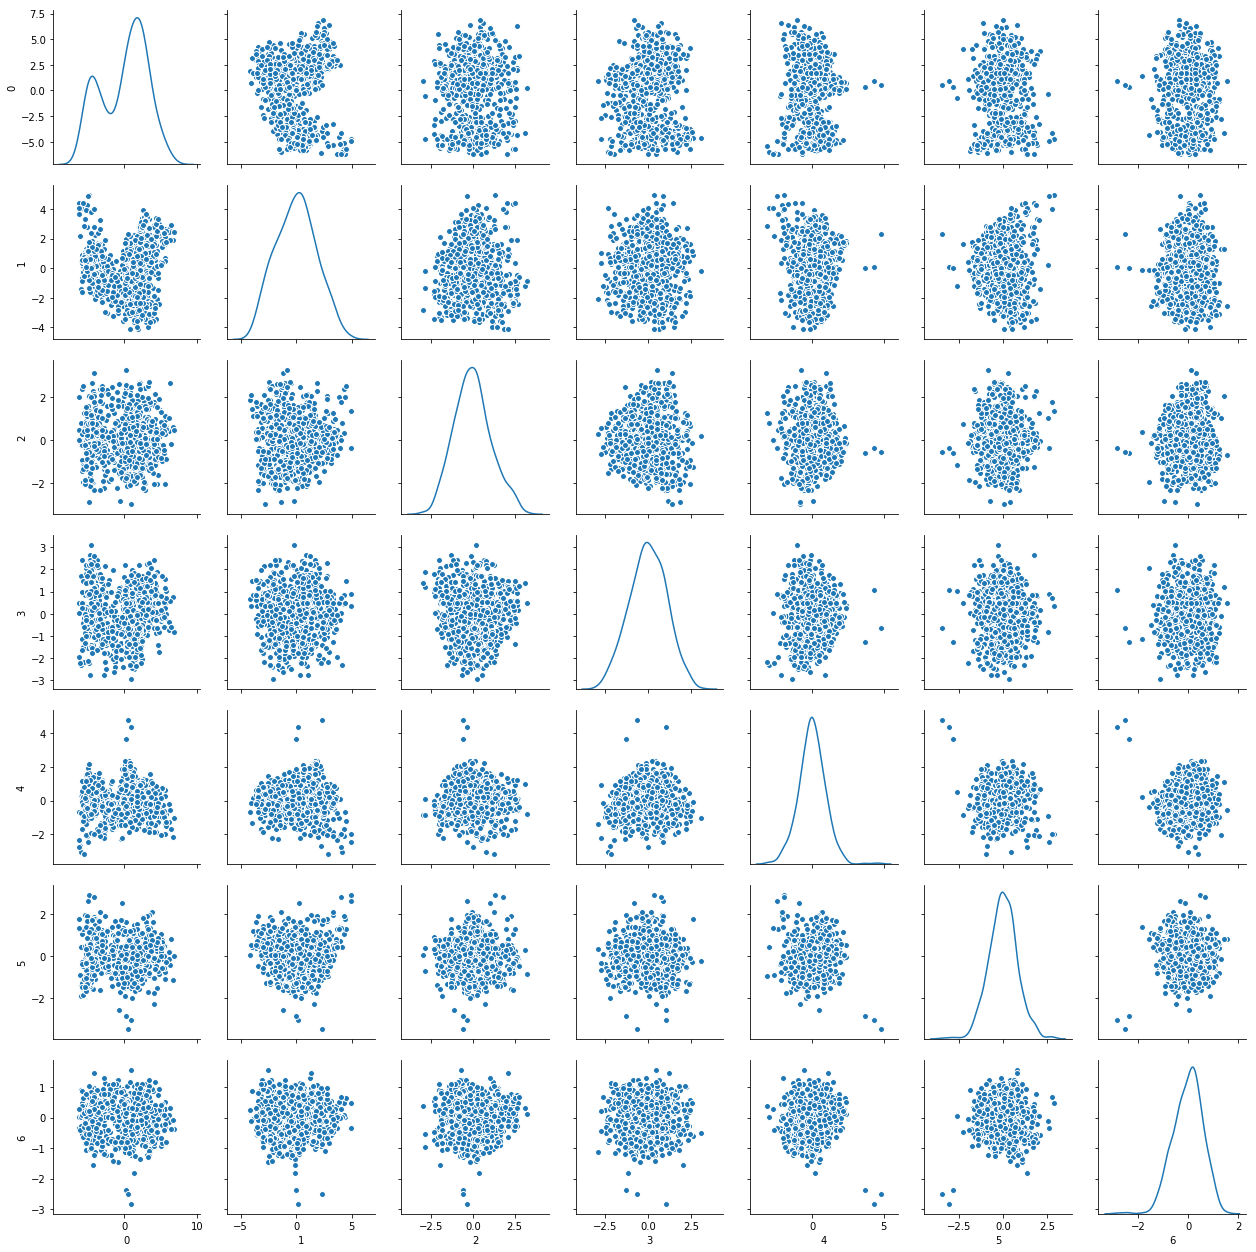

In [318]:
sns.pairplot(Proj_data_df,diag_kind='kde',kind='scatter')

In [319]:
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X_std_R, y, test_size=0.3, random_state=seed)
X_train.shape,X_test.shape

((554, 7), (238, 7))

In [320]:
# Apply the data on the logistic regression to check the accuracy
model = LogisticRegression()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(result)
#Predict the test set values
y_pred = model.predict(X_test)

#Compute confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

#Comparing the predictions with the actual results
comparison = pd.DataFrame(y_test,columns=['y_test'])
comparison['y_predicted'] = y_pred
comparison.head(5)

0.8025210084033614
[[100  12  14]
 [  6  49   4]
 [  8   3  42]]


y_test  y_predicted
0       3            2
1       3            3
2       1            1
3       1            2
4       1            1

### Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [324]:
# SVC - Lets try to apply this on the non linear classifiers

X = Veh_df[features].values
y = Veh_df['class'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [325]:
prediction = model.predict(X_test)
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test, prediction))

             precision    recall  f1-score   support

          1       0.99      0.94      0.97        88
          2       0.90      0.97      0.94        39
          3       0.94      0.97      0.95        32

avg / total       0.96      0.96      0.96       159

[[83  3  2]
 [ 1 38  0]
 [ 0  1 31]]


In [326]:
param_grid = {'C':[0.01,0.05,0.5,1],'gamma':[1], 'kernel':['linear','rbf']}
gs = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
gs.fit(X_train,y_train.flatten())


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ......................... C=0.01, gamma=1, kernel=linear -   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ......................... C=0.01, gamma=1, kernel=linear -   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ......................... C=0.01, gamma=1, kernel=linear -   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ............................ C=0.01, gamma=1, kernel=rbf -   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ............................ C=0.01, gamma=1, kernel=rbf -   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ............................ C=0.01, gamma=1, kernel=rbf -   0.0s
[CV] C=0.05, gamma=1, kernel=linear ..................................
[CV] ............

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................. C=0.5, gamma=1, kernel=rbf -   0.0s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ............................. C=0.5, gamma=1, kernel=rbf -   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............................ C=1, gamma=1, kernel=linear -   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............................ C=1, gamma=1, kernel=linear -   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............................ C=1, gamma=1, kernel=linear -   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............................... C=1, gamma=1, kernel=rbf -   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............................... C=1, gamma=1, kernel=rbf -   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.05, 0.5, 1], 'gamma': [1], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [327]:
gs.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [328]:
predic = gs.predict(X_test)

In [329]:
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

             precision    recall  f1-score   support

          1       0.98      0.93      0.95        88
          2       0.93      0.95      0.94        39
          3       0.86      0.94      0.90        32

avg / total       0.94      0.94      0.94       159

[[82  2  4]
 [ 1 37  1]
 [ 1  1 30]]


In [330]:
#Comparing the predictions with the actual results
comparison = pd.DataFrame(y_test,columns=['y_test'])
comparison['y_predicted'] = predic
comparison.head(5)

y_test  y_predicted
0       1            1
1       1            1
2       2            2
3       2            2
4       2            2

In [331]:
#Apply k-fold cross validation here

from sklearn.model_selection import cross_val_score

model = SVC(C=1, gamma=1, kernel='linear')

accuracies = cross_val_score(estimator=model,X=X_train,y=y_train,cv=10)
accuracies.mean()

0.9606350019516003